In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv


In [2]:
!pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=770e3e9e0ec84814a1d33853d4e477eae2ba8006d95744bf341cd8bf7cb9ff7c
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


In [3]:
import pandas as pd
from skrebate import ReliefF
import numpy as np

# Load your dataset from the CSV file
dataset_path = '/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv'
data = pd.read_csv(dataset_path)

# Separate the features (X) and target variable (y)
X = data.drop(columns=['target'])  # Adjust 'target' to your target column name
y = data['target']

# Get the feature names (assuming they are column names in your CSV)
feature_names = X.columns

# Initialize the ReliefF feature selector
relief = ReliefF()

# Fit the ReliefF selector on the data
relief.fit(X.values, y.values)

# Get the feature scores
feature_scores = relief.feature_importances_

# Create a dictionary to associate feature names with their scores
feature_rankings = {feature_names[i]: score for i, score in enumerate(feature_scores)}

# Sort the features by their scores (higher scores are more important)
sorted_rankings = sorted(feature_rankings.items(), key=lambda x: x[1], reverse=True)

# Print the feature rankings with names
print("Feature Rankings:")
for rank, (name, score) in enumerate(sorted_rankings):
    print(f"Rank {rank + 1}: {name} with score {score:.4f}")


Feature Rankings:
Rank 1: ST slope with score 0.2390
Rank 2: chest pain type with score 0.1958
Rank 3: exercise angina with score 0.1362
Rank 4: sex with score 0.0900
Rank 5: oldpeak with score 0.0887
Rank 6: max heart rate with score 0.0763
Rank 7: resting ecg with score 0.0684
Rank 8: cholesterol with score 0.0540
Rank 9: fasting blood sugar with score 0.0480
Rank 10: age with score 0.0403
Rank 11: resting bp s with score 0.0220


In [4]:
# sex, oldpeak, max heart rate, resting ecg, cholesterol, fasting blood sugar, age, resting bp s
# max heart rate, resting ecg, cholesterol, fasting blood sugar, age, resting bp s
# cholesterol, fasting blood sugar, age, resting bp s

**Logistic Regression**

Training Accuracy: 0.8067226890756303
Testing Accuracy: 0.8151260504201681


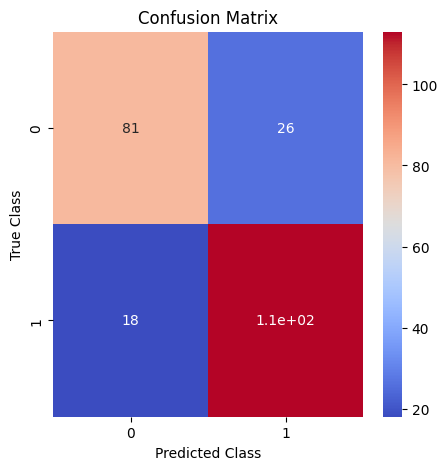

Precision: 0.8129496402877698
Sensitivity: 0.8625954198473282
Specificity: 0.7570093457943925
F1-score: 0.837037037037037


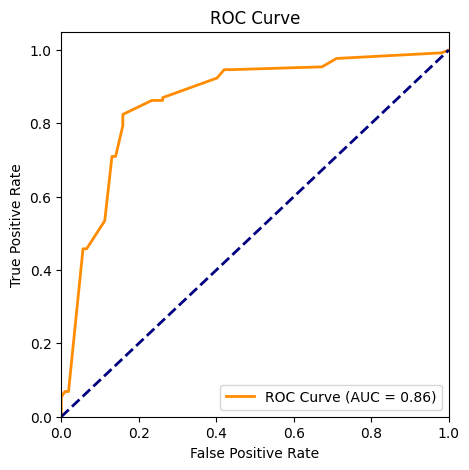

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Multiple Regression**

Accuracy: 0.6764705882352942


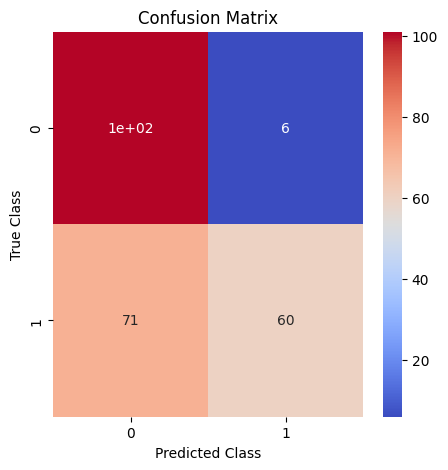

Precision: 0.9090909090909091
Sensitivity: 0.4580152671755725
Specificity: 0.9439252336448598
F1-score: 0.6091370558375634


In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# predictions on the test set
y_pred = regr.predict(X_test)

# applying a threshold of 0.8 to obtain binary predictions
y_pred_binary = np.where(y_pred >= 0.8, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

**Decision Tree**

Training Accuracy: 0.8214285714285714
Testing Accuracy: 0.8361344537815126


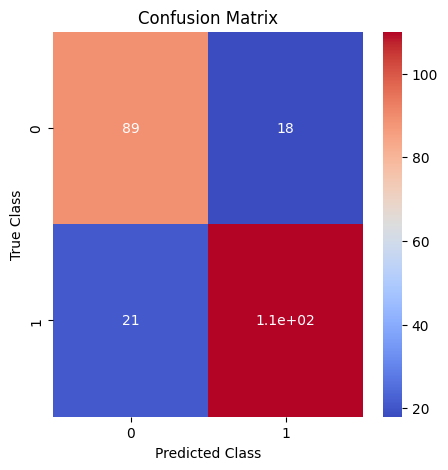

Precision: 0.859375
Sensitivity: 0.8396946564885496
Specificity: 0.8317757009345794
F1-score: 0.8494208494208494


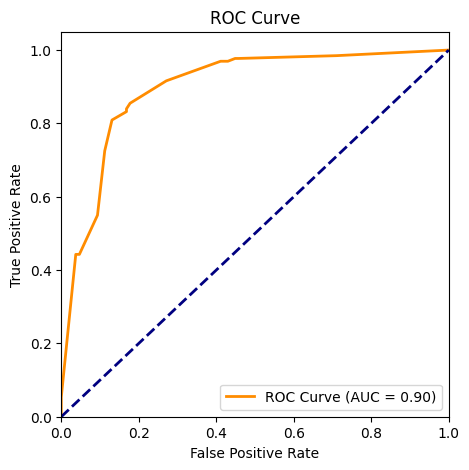

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth = 5, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Random Forest**

Training Accuracy: 0.8214285714285714
Testing Accuracy: 0.8403361344537815


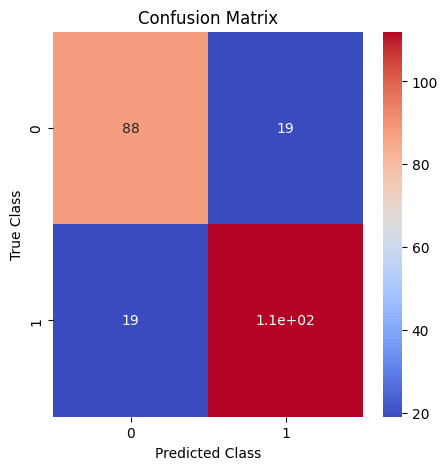

Precision: 0.8549618320610687
Sensitivity: 0.8549618320610687
Specificity: 0.822429906542056
F1-score: 0.8549618320610687


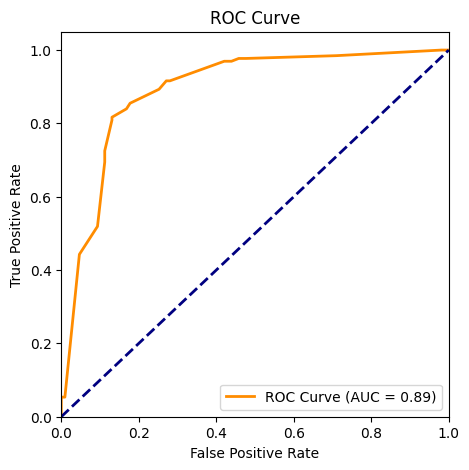

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(max_depth = 5, n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**KNN**

Training Accuracy: 0.7930672268907563
Testing Accuracy: 0.7941176470588235


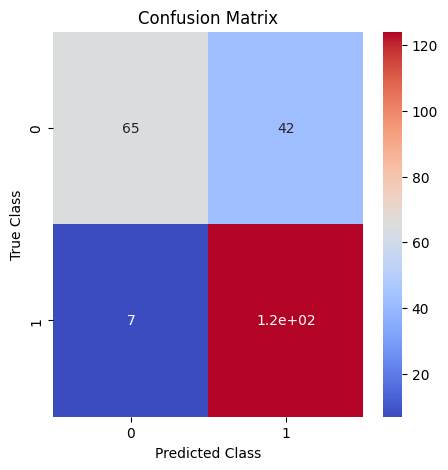

Precision: 0.7469879518072289
Sensitivity: 0.9465648854961832
Specificity: 0.6074766355140186
F1-score: 0.835016835016835


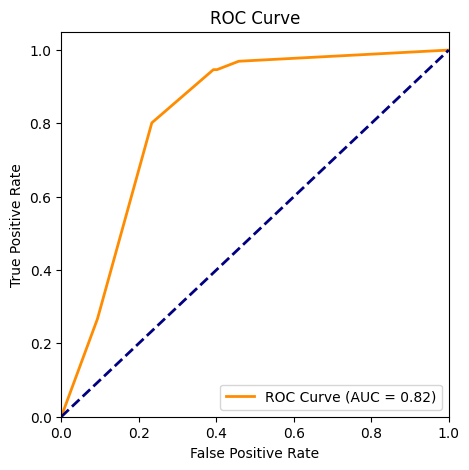

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**SVM**

Training Accuracy: 0.8077731092436975
Testing Accuracy: 0.819327731092437


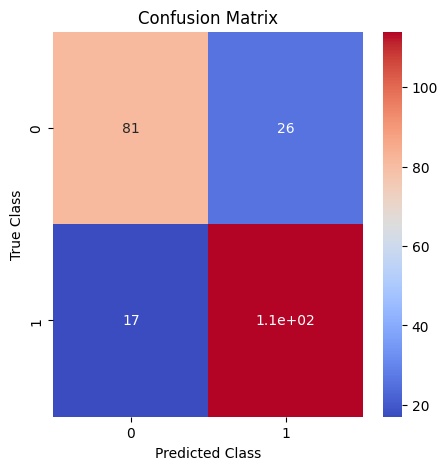

Precision: 0.8142857142857143
Sensitivity: 0.8702290076335878
Specificity: 0.7570093457943925
F1-score: 0.8413284132841329


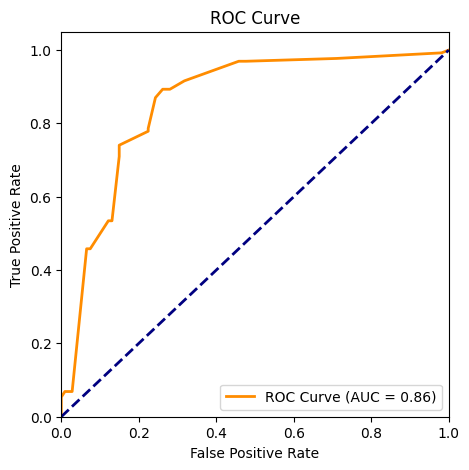

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability = True)
svm_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Naive Bayes**

Training Accuracy: 0.8014705882352942
Testing Accuracy: 0.8235294117647058


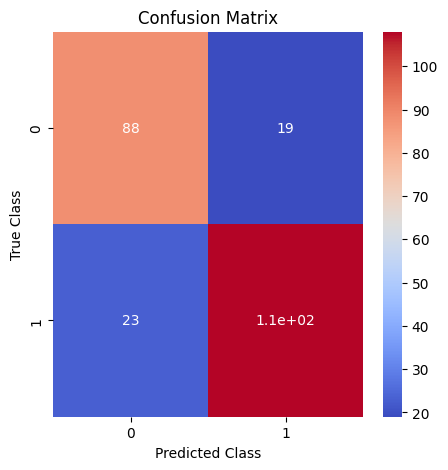

Precision: 0.8503937007874016
Sensitivity: 0.8244274809160306
Specificity: 0.822429906542056
F1-score: 0.8372093023255814


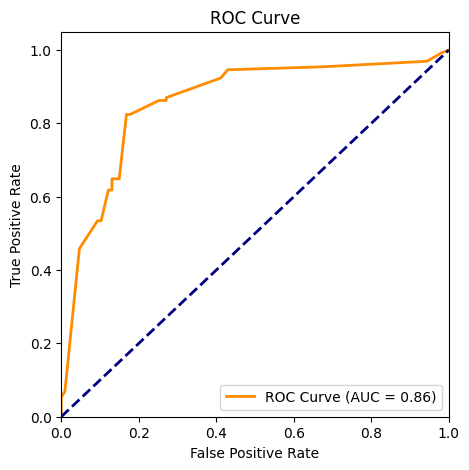

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gaussian Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**MLP**

Training Accuracy: 0.8203781512605042
Testing Accuracy: 0.8403361344537815


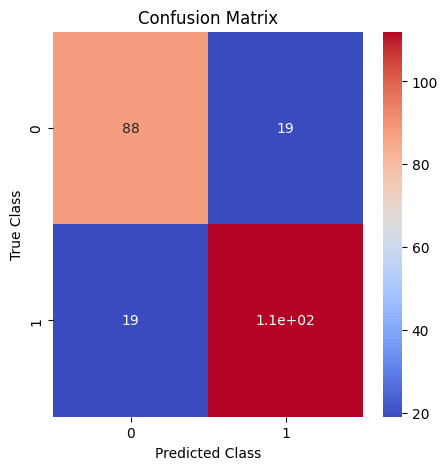

Precision: 0.8549618320610687
Sensitivity: 0.8549618320610687
Specificity: 0.822429906542056
F1-score: 0.8549618320610687


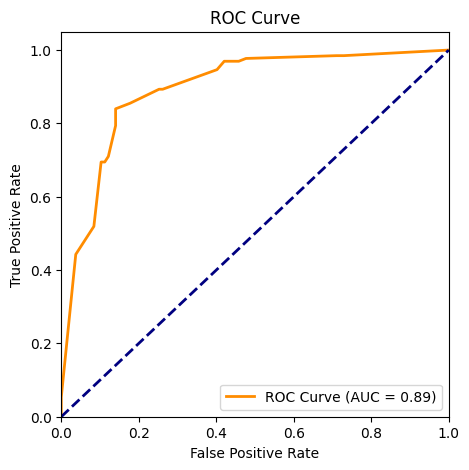

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an Artificial Neural Network (ANN) classifier
ann_model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = ann_model.predict(X_train)
y_test_pred = ann_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ann_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, ann_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**XGBoost**

Training Accuracy: 0.8235294117647058
Testing Accuracy: 0.8235294117647058


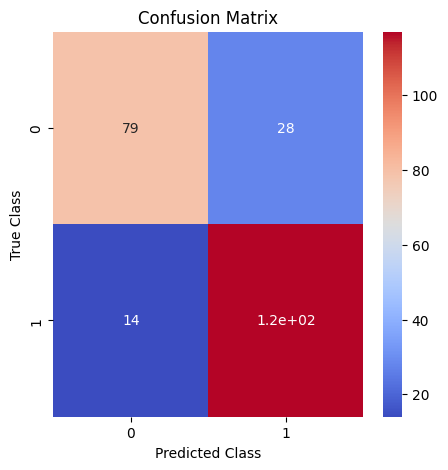

Precision: 0.8068965517241379
Sensitivity (Recall): 0.8931297709923665
Specificity: 0.7383177570093458
F1-score: 0.8478260869565216


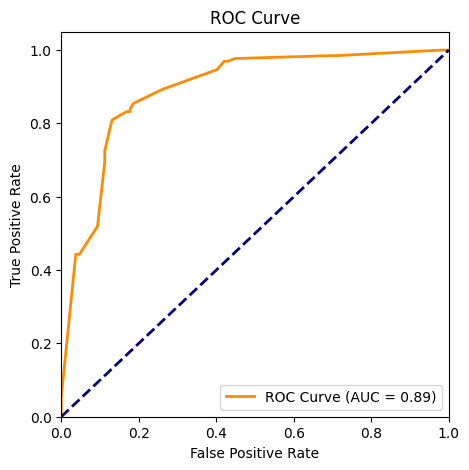

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Training Accuracy: 0.8224789915966386
Testing Accuracy: 0.8277310924369747


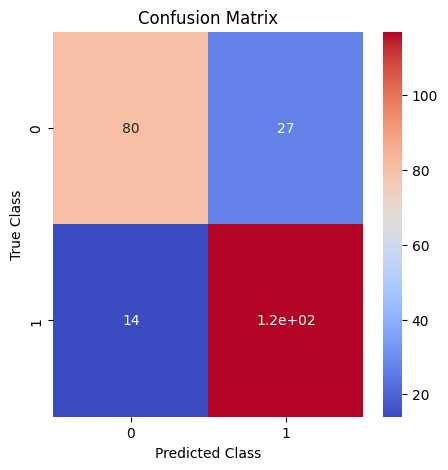

Precision: 0.8125
Sensitivity (Recall): 0.8931297709923665
Specificity: 0.7476635514018691
F1-score: 0.850909090909091


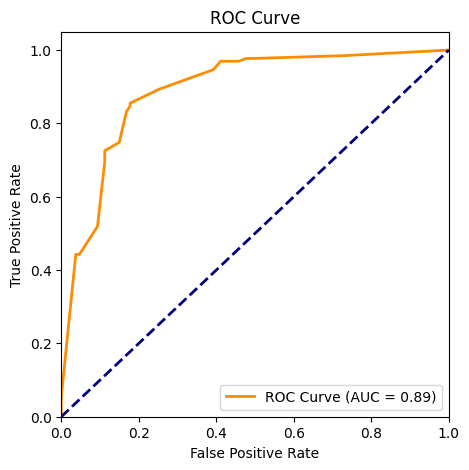

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier with overfitting mitigation techniques
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=3,  # Limit tree depth
    min_child_weight=1,  # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,  # Fraction of samples used for training
    colsample_bytree=0.8,  # Fraction of features used for training
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=1.0  # L2 regularization term on weights
)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**AdaBoost**

Training Accuracy: 0.8172268907563025
Testing Accuracy: 0.8361344537815126


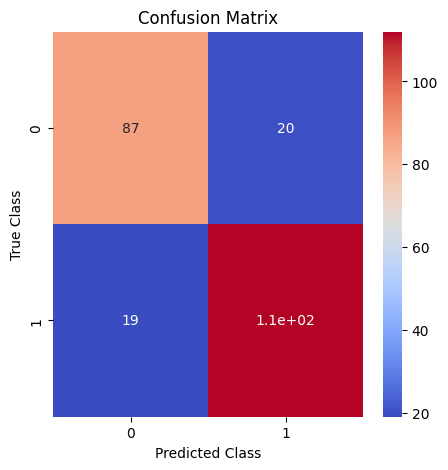

Precision: 0.8484848484848485
Sensitivity (Recall): 0.8549618320610687
Specificity: 0.8130841121495327
F1-score: 0.8517110266159695


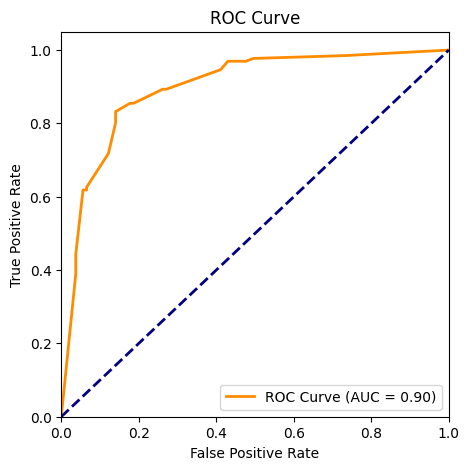

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, adaboost_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Stochastic Gradient Classifier**

Training Accuracy: 0.8004201680672269
Testing Accuracy: 0.8109243697478992


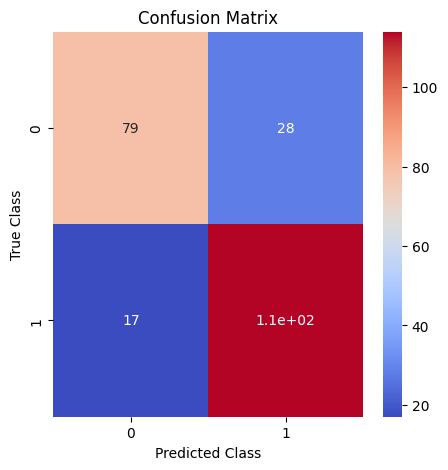

Precision: 0.8028169014084507
Sensitivity (Recall): 0.8702290076335878
Specificity: 0.7383177570093458
F1-score: 0.8351648351648351


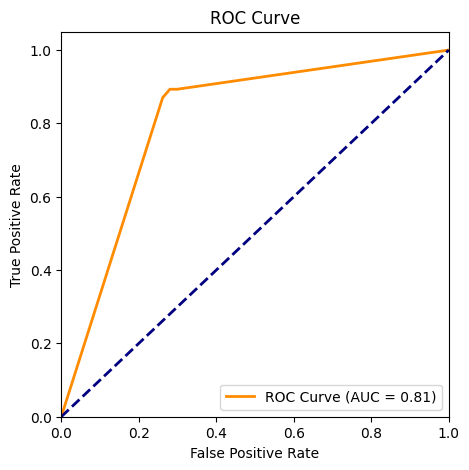

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SGD Classifier
sgd_model = SGDClassifier(loss = "modified_huber", random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Training Accuracy: 0.7710084033613446
Testing Accuracy: 0.7773109243697479


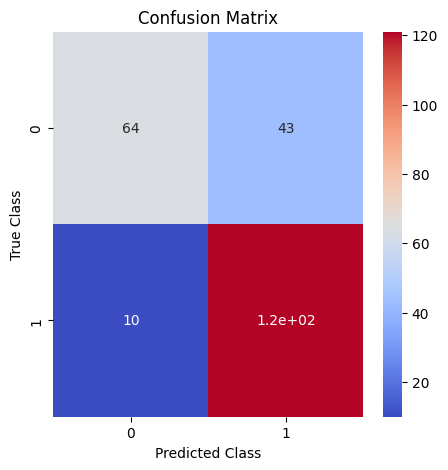

Precision: 0.7378048780487805
Sensitivity (Recall): 0.9236641221374046
Specificity: 0.5981308411214953
F1-score: 0.8203389830508474


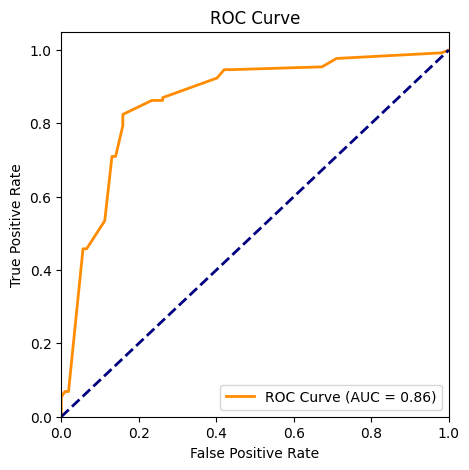

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an SGD Classifier
sgd_model = SGDClassifier(
    loss="log",  # The loss function (hinge for linear SVM)
    penalty="l2",  # Regularization term (l2 for Ridge regularization)
    alpha=0.001,  # Regularization strength
    max_iter=1000,  # Maximum number of iterations
    random_state=42
)

sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Gradient Boosting Classifier**

Training Accuracy: 0.8245798319327731
Testing Accuracy: 0.8235294117647058


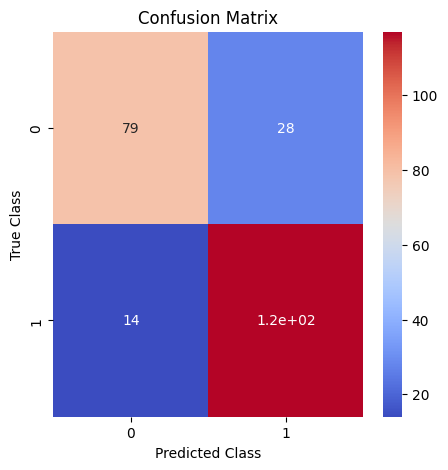

Precision: 0.8068965517241379
Sensitivity (Recall): 0.8931297709923665
Specificity: 0.7383177570093458
F1-score: 0.8478260869565216


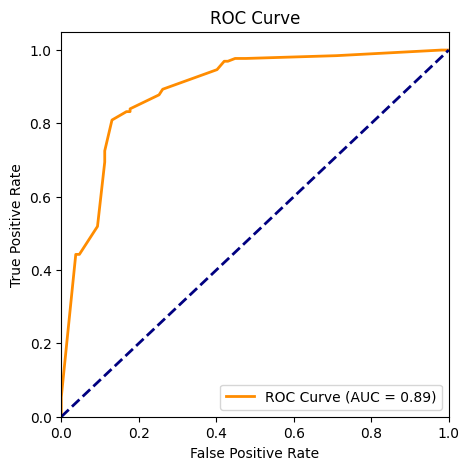

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages to be used
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

gb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Extra Tree Classifier**

Training Accuracy: 0.8224789915966386
Testing Accuracy: 0.8361344537815126


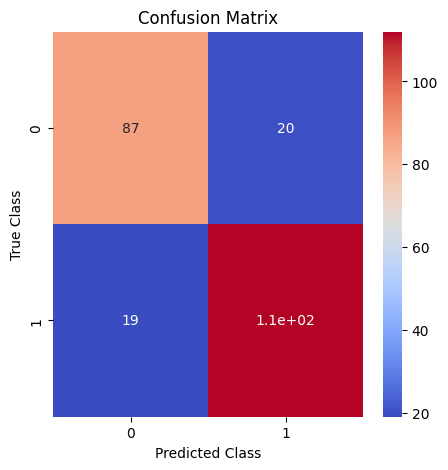

Precision: 0.8484848484848485
Sensitivity (Recall): 0.8549618320610687
Specificity: 0.8130841121495327
F1-score: 0.8517110266159695


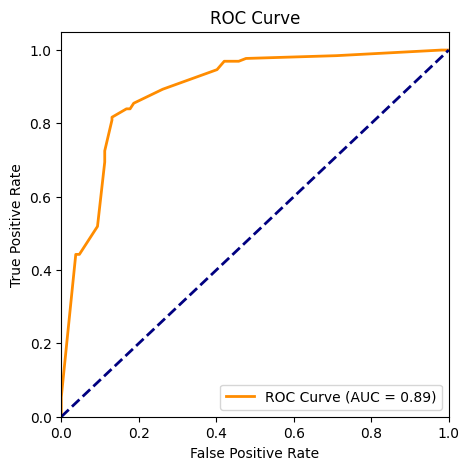

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

extra_trees_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = extra_trees_model.predict(X_train)
y_test_pred = extra_trees_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, extra_trees_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, extra_trees_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**RNN**

Epoch 1/100
24/24 - 4s - loss: 0.5115 - accuracy: 0.7608 - val_loss: 0.5368 - val_accuracy: 0.7644 - 4s/epoch - 150ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4284 - accuracy: 0.8173 - val_loss: 0.5187 - val_accuracy: 0.7644 - 119ms/epoch - 5ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4197 - accuracy: 0.8187 - val_loss: 0.5069 - val_accuracy: 0.7592 - 113ms/epoch - 5ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4157 - accuracy: 0.8108 - val_loss: 0.5217 - val_accuracy: 0.7644 - 115ms/epoch - 5ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4125 - accuracy: 0.8081 - val_loss: 0.5078 - val_accuracy: 0.7644 - 120ms/epoch - 5ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4091 - accuracy: 0.8173 - val_loss: 0.5129 - val_accuracy: 0.7644 - 121ms/epoch - 5ms/step
Epoch 7/100
24/24 - 0s - loss: 0.4075 - accuracy: 0.8160 - val_loss: 0.5048 - val_accuracy: 0.7749 - 130ms/epoch - 5ms/step
Epoch 8/100
24/24 - 0s - loss: 0.4073 - accuracy: 0.8042 - val_loss: 0.5072 - val_accuracy: 0.7644 - 124ms/epoch - 5ms/step
Epoch 9/1

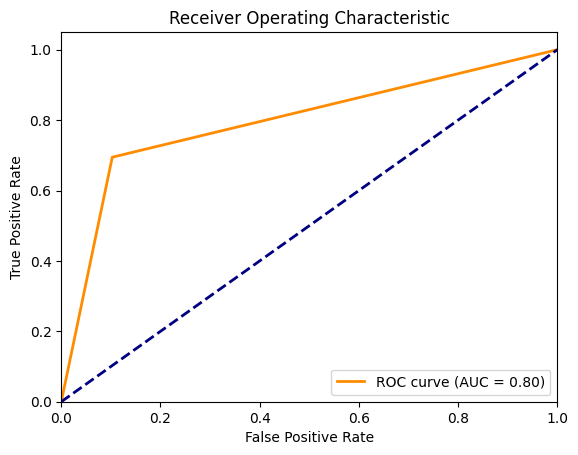

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for SimpleRNN input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the RNN model using SimpleRNN
model = keras.Sequential([
    layers.SimpleRNN(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**LSTM**

Epoch 1/100
24/24 - 7s - loss: 0.6887 - accuracy: 0.7043 - val_loss: 0.6820 - val_accuracy: 0.7120 - 7s/epoch - 296ms/step
Epoch 2/100
24/24 - 0s - loss: 0.6375 - accuracy: 0.7976 - val_loss: 0.5946 - val_accuracy: 0.7487 - 215ms/epoch - 9ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4866 - accuracy: 0.8147 - val_loss: 0.5266 - val_accuracy: 0.7487 - 201ms/epoch - 8ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4343 - accuracy: 0.8160 - val_loss: 0.5204 - val_accuracy: 0.7644 - 213ms/epoch - 9ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4270 - accuracy: 0.8095 - val_loss: 0.5204 - val_accuracy: 0.7801 - 209ms/epoch - 9ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4217 - accuracy: 0.8187 - val_loss: 0.5200 - val_accuracy: 0.7801 - 219ms/epoch - 9ms/step
Epoch 7/100
24/24 - 0s - loss: 0.4193 - accuracy: 0.8187 - val_loss: 0.5130 - val_accuracy: 0.7801 - 215ms/epoch - 9ms/step
Epoch 8/100
24/24 - 0s - loss: 0.4173 - accuracy: 0.8187 - val_loss: 0.5189 - val_accuracy: 0.7801 - 235ms/epoch - 10ms/step
Epoch 9/

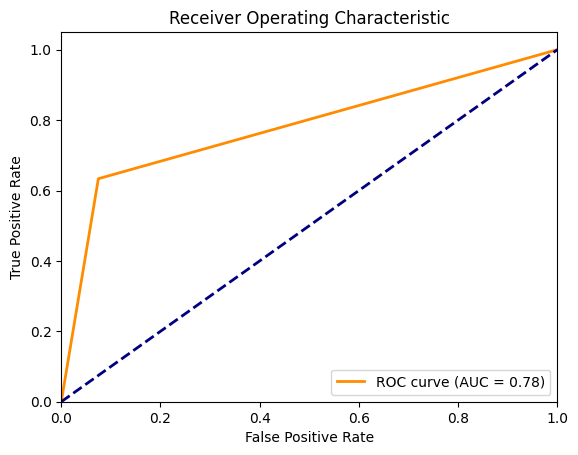

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for LSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the LSTM model
model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**GRU**

Epoch 1/100
24/24 - 7s - loss: 0.6482 - accuracy: 0.7753 - val_loss: 0.5997 - val_accuracy: 0.7592 - 7s/epoch - 278ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4762 - accuracy: 0.8081 - val_loss: 0.5364 - val_accuracy: 0.7487 - 197ms/epoch - 8ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4300 - accuracy: 0.8147 - val_loss: 0.5197 - val_accuracy: 0.7749 - 195ms/epoch - 8ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4237 - accuracy: 0.8213 - val_loss: 0.5154 - val_accuracy: 0.7644 - 202ms/epoch - 8ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4171 - accuracy: 0.8108 - val_loss: 0.5195 - val_accuracy: 0.7801 - 205ms/epoch - 9ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4135 - accuracy: 0.8160 - val_loss: 0.5183 - val_accuracy: 0.7644 - 196ms/epoch - 8ms/step
Epoch 7/100
24/24 - 0s - loss: 0.4116 - accuracy: 0.8200 - val_loss: 0.5114 - val_accuracy: 0.7644 - 203ms/epoch - 8ms/step
Epoch 8/100
24/24 - 0s - loss: 0.4112 - accuracy: 0.8147 - val_loss: 0.5161 - val_accuracy: 0.7644 - 213ms/epoch - 9ms/step
Epoch 9/1

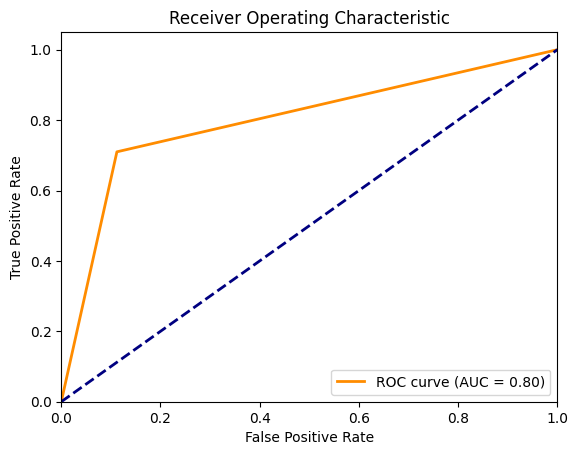

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for GRU input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the GRU model
model = keras.Sequential([
    layers.GRU(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.GRU(64, return_sequences=True),
    layers.GRU(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**CNN**

**BiLSTM**

Epoch 1/100
24/24 - 10s - loss: 0.6870 - accuracy: 0.7608 - val_loss: 0.6765 - val_accuracy: 0.7487 - 10s/epoch - 417ms/step
Epoch 2/100
24/24 - 0s - loss: 0.6192 - accuracy: 0.8147 - val_loss: 0.5572 - val_accuracy: 0.7487 - 259ms/epoch - 11ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4596 - accuracy: 0.8108 - val_loss: 0.5691 - val_accuracy: 0.7644 - 261ms/epoch - 11ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4342 - accuracy: 0.8187 - val_loss: 0.5397 - val_accuracy: 0.7801 - 269ms/epoch - 11ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4258 - accuracy: 0.8134 - val_loss: 0.5465 - val_accuracy: 0.7801 - 266ms/epoch - 11ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4245 - accuracy: 0.8187 - val_loss: 0.5332 - val_accuracy: 0.7801 - 270ms/epoch - 11ms/step
Epoch 7/100
24/24 - 0s - loss: 0.4210 - accuracy: 0.8187 - val_loss: 0.5268 - val_accuracy: 0.7801 - 273ms/epoch - 11ms/step
Epoch 8/100
24/24 - 0s - loss: 0.4205 - accuracy: 0.8187 - val_loss: 0.5255 - val_accuracy: 0.7801 - 264ms/epoch - 11ms/step


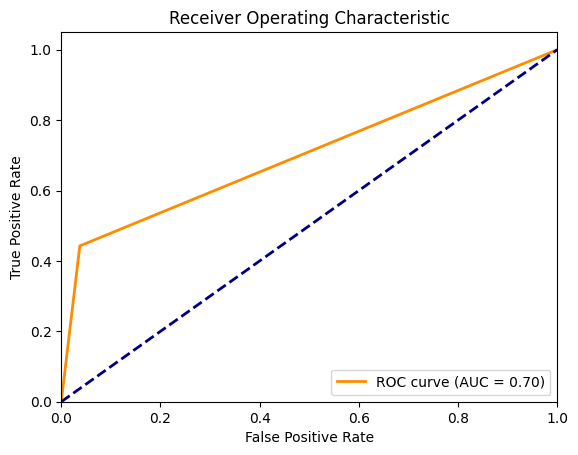

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.LSTM(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.LSTM(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**BiGRU**

Epoch 1/100
24/24 - 10s - loss: 0.6373 - accuracy: 0.7753 - val_loss: 0.5850 - val_accuracy: 0.7539 - 10s/epoch - 412ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4668 - accuracy: 0.8108 - val_loss: 0.5509 - val_accuracy: 0.7644 - 228ms/epoch - 9ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4287 - accuracy: 0.8173 - val_loss: 0.5136 - val_accuracy: 0.7801 - 226ms/epoch - 9ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4186 - accuracy: 0.8095 - val_loss: 0.5440 - val_accuracy: 0.7801 - 235ms/epoch - 10ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4181 - accuracy: 0.8160 - val_loss: 0.5167 - val_accuracy: 0.7644 - 234ms/epoch - 10ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4111 - accuracy: 0.8187 - val_loss: 0.5221 - val_accuracy: 0.7644 - 236ms/epoch - 10ms/step
Epoch 7/100
24/24 - 0s - loss: 0.4086 - accuracy: 0.8213 - val_loss: 0.5165 - val_accuracy: 0.7801 - 244ms/epoch - 10ms/step
Epoch 8/100
24/24 - 0s - loss: 0.4070 - accuracy: 0.8029 - val_loss: 0.5128 - val_accuracy: 0.7644 - 245ms/epoch - 10ms/step
Ep

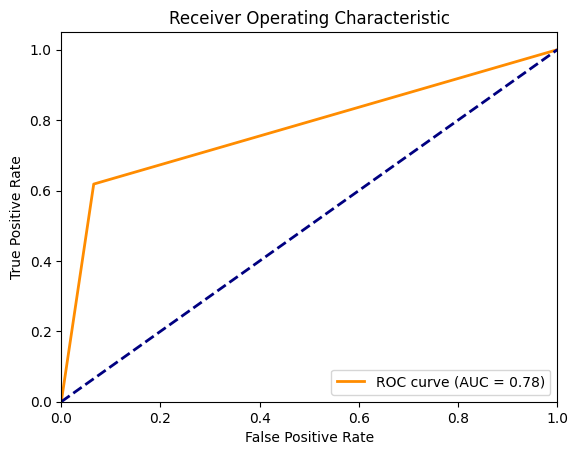

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_3 = ["sex", "oldpeak", "max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_5 = ["max heart rate", "resting ecg", "cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
columns_to_drop_7 = ["cholesterol", "fasting blood sugar", "age", "resting bp s", "target"]
X = data.drop(columns_to_drop_3, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.GRU(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.GRU(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.GRU(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
